# Bike Sharing Project

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the dataset

In [12]:
rides = pd.read_csv('hour.csv')
rides.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Below graph shows the amount of bike riders over 7 days

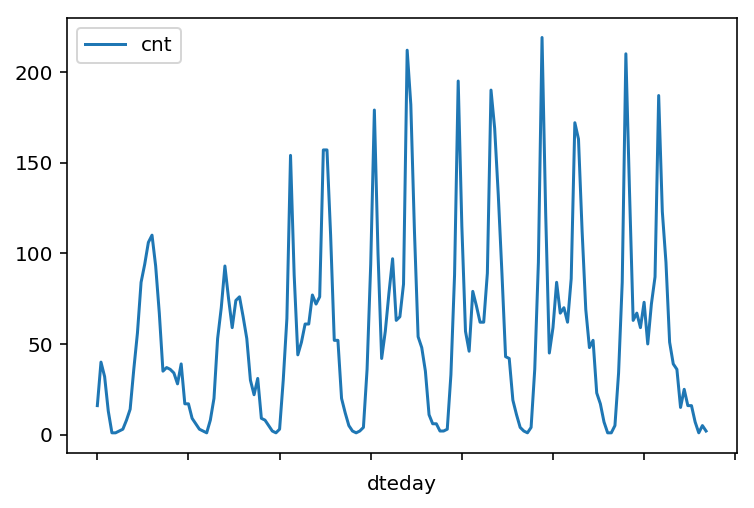

In [11]:
rides[:24 * 7].plot(x = 'dteday', y='cnt')

# Handling the categorical variables

In [15]:
categorical_variables = ['season', 'mnth', 'weathersit', 'hr', 'weekday']

for each in categorical_variables:
    dummy_vars = pd.get_dummies(rides[each], prefix=each)
    rides = pd.concat([rides, dummy_vars], axis = 1)
    
fields_to_drop = fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']

data = rides.drop(columns=fields_to_drop, axis = 1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,1,2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


# Normalization

Shift and scale the variables such that they have zero mean and a standard deviation of 1.

In [24]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

scaled_features = {}
for each in quant_features:
    mean, std = rides[each].mean(), rides[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean) / std

data.head()

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,yr,holiday,temp,hum,windspeed,casual,registered,cnt,1,2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-272.526469,24.474756,-966.665026,-0.738561,-1.022810,-1.050311,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-287.074382,17.256996,-966.665026,-0.738560,-1.022809,-1.050311,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-287.074382,17.256996,-966.665026,-0.738560,-1.022810,-1.050311,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-272.526469,-18.831804,-966.665026,-0.738561,-1.022810,-1.050311,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-272.526469,-18.831804,-966.665026,-0.738561,-1.022810,-1.050311,1,0,...,0,0,0,0,0,0,0,0,0,1


# Train-test-validation split

In [37]:
data = rides[:-21 * 24]

test_data = rides[-21 * 24:]

In [41]:
#Features of the dataset
target_fiels = ['cnt', 'casual', 'registered']

data_features, data_targets = data.drop(target_fiels, axis=1), data[target_fiels]
test_features, test_targets = test_data.drop(target_fiels, axis = 1), test_data[target_fiels]




In [42]:
train_features, train_targets = data_features[:-60 * 24], data_targets[:-60*24]

validation_features, validation_targets = data_features[-60 * 24:], data_targets[-60 * 24:]

# Building the Neural Network